<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

## <center>**Delhi House Price Analysis**</center>

## **Table of Contents**

1. [**Problem Statement**](#section1)<br>
2. [**Importing Packages**](#section2)<br>
3. [**Loading Data**](#section3)<br>
4. [**Description of the Dataset**](#section401)<br>
5. [**Data Preprocessing**](#section5)<br>
6. [**Exploratory Data Analysis**](#section6)<br>
7. [**Conclusion**](#section7)<br>

<a id=section1></a>

---
# **1. Problem Statement**
---

- **NewBricks Pvt Ltd** is a website that provides a common platform for **property buyers** & **sellers** to locate properties of interest in India, and source information about all property related issues.

-	Apart from buying, **selling** & **renting properties in India**, users have access to guides that cover all the essential steps and stages entailed in property buying.

-	They also provide a **tool** which empowers **property seekers** and **investors** with detailed information on the **movement** of **residential apartment prices** and **supply of properties**.

<center>

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fclipground.com%2Fimages%2Fcoloured-houses-clipart-5.jpg&f=1&nofb=1" width=50%>

</center>

- Recently, they have been seeing a **surge** in **number of listings** on their website.

- They want to leverage this **opportunity** and **determine** the **relation of prices** of listed housing properties with various factors.

- They have hired you - a data analyst to perform the analysis on houses that have been listed in and near Delhi.

- Your job is to determine which **factors** result in **price fluctuations** of houses in Delhi.









<a id=section2></a>

---
# **2. Importing Libraries**
---

In [ ]:
!pip install pandas-profiling -q --upgrade

     |████████████████████████████████| 596 kB 7.0 MB/s 
     |████████████████████████████████| 675 kB 53.8 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 3.1 MB 54.5 MB/s 
     |████████████████████████████████| 102 kB 15.0 MB/s 
     |████████████████████████████████| 10.1 MB 49.9 MB/s 
     |████████████████████████████████| 303 kB 67.8 MB/s 
     |████████████████████████████████| 812 kB 72.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
np.set_printoptions(precision=4)                  
#--------------------------------------------------------------------------------
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('mode.chained_assignment', None)       
pd.set_option('display.max_colwidth', None)          
pd.set_option('display.max_columns', None)      
#--------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns            
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from wordcloud import WordCloud                                     # To create wordclouds
from wordcloud import STOPWORDS                                     # To import a list of stopwords that remove unnecessary unicode text
#--------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

<a id=section3></a>

---
# **3. Loading Data**
---

In [ ]:
data = pd.read_csv('/content/MagicBricks.csv')
print('Train Data Shape:', data.shape)
data.head()

Train Data Shape: (1259, 11)


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,"Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge",1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


<a id=section4></a>

---
# **4. Data Description**
---

<br>

|Dataset| Records | Features | Dataset Size |
| :--: | :--: | :--: | :--: |
| Delhi House Price Data | 1259 | 11 | 153 KB |

<br>

- The dataset consists of the following features:

<br>

|ID|Feature name|Feature description|
|:--|:--|:--|
|1|**Area**| Area of the Property in square feet |
|2|**BHK**| No. of Bedrooms along with 1 Hall and 1 kitchen |
|3|**Bathroom**| No. of Bathrooms |
|4|**Furnishing**| Whether listed property is furnished , unfurnished or semi furnished |
|5|**Locality**| Locality in which property lies |
|6|**Parking**| No. of parking available |
|7|**Status**| property's status as in 'ready to move' or still under construction |
|8|**Transaction**| Its a new property or being re-sold |
|9|**Type**| Its an Apartment or Builder Floor |
|10|**Per_Sqft**| Price per square feet |
|11|**Price**| This is the Price of property in INR |


<br>



In [ ]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


**Observations:**

**Observations:**

- **Area** ranges from **28.0** to **24300.0**, averaging at **1447.54**.

- **BHK** ranges from **1** to **10**, averaging at **2.79**.

- **Bathroom** ranges from **1.0** to **7.0**, averaging at **2.55**.

- **Price** ranges from **1000000** to **240000000**, averaging at **21091726.19**.

- **Per_Sqft** ranges from **1259.0** to **183333.0**, averaging at **15817.31**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


**Observations:**

- We have **2 int64 data type** features, **4 float64 data type** features and **5 object data type** features in the independent features.

- We can see a gist of missing values in the dataset. Let's see what the profiling report says:

<a id=section5></a>

---
# **5 Data Preprocessing**
---

<a id=section51></a>

---
## **5.1 Pandas Pre-profiling**
---

In [ ]:
# profile = ProfileReport(data, title='Pre-Profiling Report')
# profile.to_file("pre profile report.html")
# profile

**Observations:**

- There are **56 (4.4%) duplicate rows** in the dataset.

- There are **286 missing cells**, most of them from **Parking** and **Per_Sqft** features.

- There are **6 Numeric**,	**5 Categorical features**.

- We observe **high cardinality** in the **Locality** feature.

- **Price** is **highly correlated** with **Area**, **BHK**, and **Bathroom** features.


<a id=section52></a>

---
## **5.2 Data Cleaning**
---

In [ ]:
data.duplicated().sum()

83

In [ ]:
data.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

**Observations:**

- We will first remove the **redundant rows** from the dataset.

- We have missing values in **5 features**.

- We will also fill the missing values in **Furnishing** and **Type** with **mode**, **Bathroom**, **Parking** and **Per_Sqft** with the mean of the features.

In [ ]:
data.drop_duplicates(inplace=True)

data['Bathroom'].fillna(data['Bathroom'].mean(), inplace=True)
data['Parking'].fillna(data['Parking'].median(), inplace=True)
data['Per_Sqft'].fillna(data['Per_Sqft'].mean(), inplace=True)
data['Furnishing'].fillna(data['Furnishing'].mode()[0], inplace=True)
data['Type'].fillna(data['Type'].mode()[0], inplace=True)

In [ ]:
data.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

- We have **succesfully imputed null values** and **removed** the **duplicated rows**.

<a id=section6></a>

---
# **6. Exploratory Data Analysis**
---

#### **Question**: What is the distribution of the Area feature?

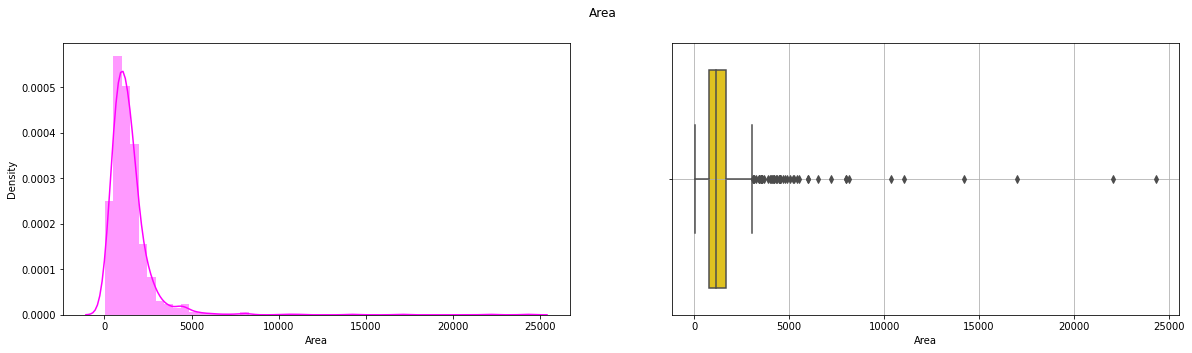

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.distplot(data['Area'], ax=ax[0], color='magenta')
sns.boxplot(data['Area'], ax=ax[1], color='gold')
plt.suptitle(t='Area')
plt.grid(b=True)
plt.show()

**Observations**:

- We can see significant outliers after 2500 sq.ft. of area and a lot of extremeties after 5000 sq.ft. of area.

#### **Question**: What is the distribution of the Per_Sqft feature?

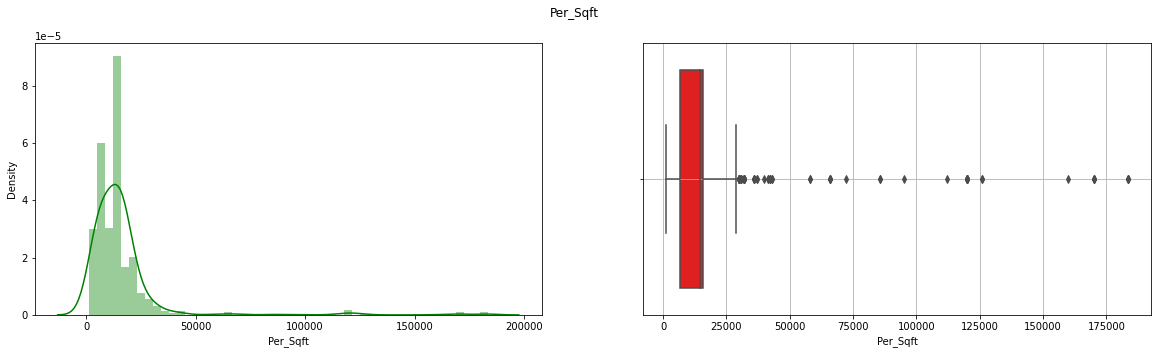

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.distplot(data['Per_Sqft'], ax=ax[0], color='green')
sns.boxplot(data['Per_Sqft'], ax=ax[1], color='red')
plt.suptitle(t='Per_Sqft')
plt.grid(b=True)
plt.show()

**Observations**:

- Price per sq.ft. increases significantly after ₹30000 per sq.ft. area maxes out at ₹183333 per sq.ft.

#### **Question**: What is the distribution of the Price feature?

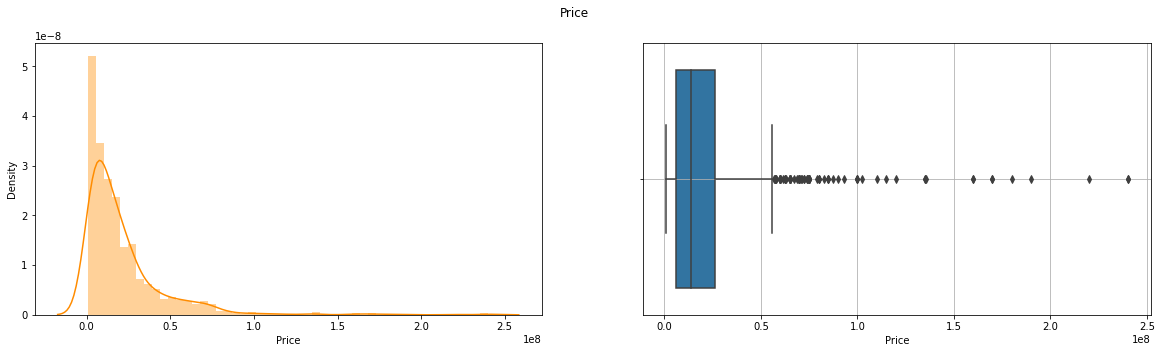

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.distplot(data['Price'], ax=ax[0], color='darkorange')
sns.boxplot(data['Price'], ax=ax[1])
plt.suptitle(t='Price')
plt.grid(b=True)
plt.show()

**Observations**:

- Most of the houses are **under ₹ 50 lacs**, but we can see a lot housing prices go **up to ₹25,00,00,000**.

#### **Question**: What are the various counts of parking spaces available?

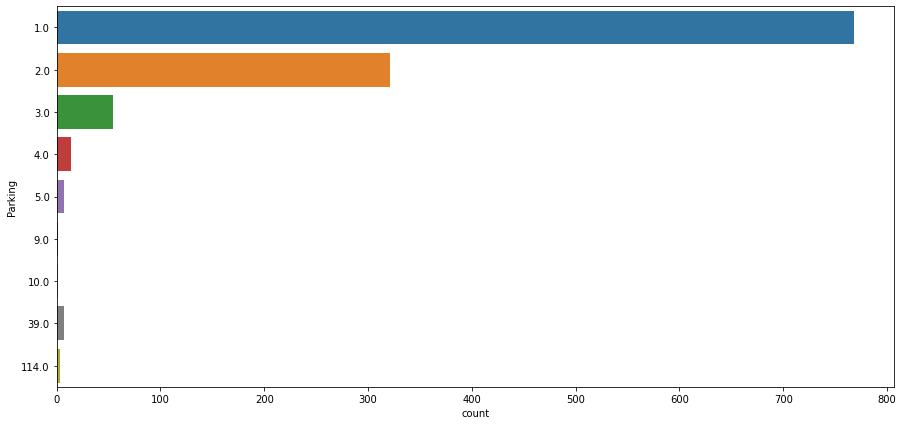

In [ ]:
fig = plt.figure(figsize=(15,7))
sns.countplot(data=data, y='Parking')
plt.show()

**Observations**:

- **Almost 50%** of the houses listed have **one parking spot**, followed by two and three.

- We can see unusual spots indicating **39** and **114 parking spots**.

#### **Question**: Explore the house details of houses with more than 20 parking spots

In [ ]:
data[data['Parking']>20]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
875,365.0,1,1.0,Unfurnished,Narela,39.0,3500000,Ready_to_move,Resale,Apartment,7143.000000
876,390.0,1,1.0,Unfurnished,"DDA Lig Flats, Narela",39.0,2000000,Ready_to_move,Resale,Apartment,5128.000000
877,350.0,1,1.0,Unfurnished,"DDA Flats Pocket 3, Narela",39.0,3000000,Ready_to_move,Resale,Apartment,5128.000000
878,210.0,1,1.0,Semi-Furnished,"DDA Lig Flats, Narela",39.0,2000000,Ready_to_move,New_Property,Apartment,5128.000000
879,50.0,1,1.0,Unfurnished,"DDA Lig Flats, Narela",39.0,3500000,Ready_to_move,New_Property,Apartment,5128.000000
880,500.0,1,1.0,Unfurnished,"DDA Pocket H, Narela",39.0,1800000,Ready_to_move,Resale,Apartment,3600.000000
881,350.0,1,1.0,Unfurnished,"DDA Lig Flats, Narela",39.0,1600000,Ready_to_move,Resale,Apartment,4571.000000
969,900.0,2,2.0,Unfurnished,"Mangal Apartment, Vasundhara Enclave",114.0,9000000,Ready_to_move,Resale,Apartment,15817.306639
970,1100.0,2,2.0,Semi-Furnished,Vasundhara Enclave,114.0,10000000,Ready_to_move,Resale,Apartment,15817.306639
971,950.0,2,2.0,Unfurnished,Vasundhara Enclave,114.0,8100000,Ready_to_move,Resale,Apartment,15817.306639


**Observations**:

- We have **10 listings** with 3**9 and 114 parking spots**.

- **39 parking spots** are available in **DDA, Narela** and **114 spots** in **Vasundhara Enclave**.

- These look like overall parking spots in the **locality/complex** and not for individual house listings.

#### **Question**: Which are some of the common localities in Delhi for housing?

In [ ]:
data['Locality'].value_counts()[:5]

Lajpat Nagar 3                            32
Kailash Colony, Greater Kailash           30
Lajpat Nagar 2                            30
Yamuna Vihar, Shahdara                    29
J R Designers Floors, Rohini Sector 24    28
Name: Locality, dtype: int64

**Observations**:

- **Lajpat Nagar**, **Kailash Colony**, **Shahdara**, and **Rohini Sector** are some of the common localities.

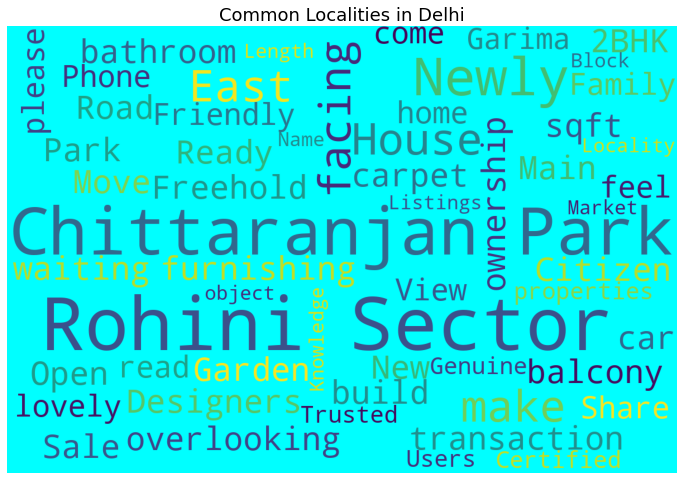

In [ ]:
# Create a figure with 12x12 inch dimension
fig = plt.figure(figsize=(12, 12))
stopwords = set(list(STOPWORDS))
stopwords.add('Property')
stopwords.add('Agent')
stopwords.add('status')
stopwords.add('area')
stopwords.add('Contact')
stopwords.add('parking')
stopwords.add('floor')
stopwords.add('Semi')
stopwords.add('Feedback')
stopwords.add('dtype')
stopwords.add('alive')
stopwords.add('Constructed')
stopwords.add('Furnished')
stopwords.add('Apartment')
stopwords.add('Floors')

wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(str(data['Locality']))

plt.title('Common Localities in Delhi', fontsize = 18)
print(wordcloud)
plt.axis('off', interpolation='bilinear')
plt.imshow(wordcloud)
plt.show()

**Observations**:

- Only 3 localities - **Rohini Sector**, **Garima**, and **Chittaranjan Park** are can be seen through the wordcount.

- The data needs extensive manual cleaning to properly extract more information.

- The other commonly occurring words in wordcloud are simply advertisements or reviews.

#### **Question**: What is the price distribution with respect to Type of house?

In [ ]:
categorical_features = data.drop(columns=['Area', 'Per_Sqft', 'Price', 'Locality'])

In [ ]:
def grouped_box(column=None):
  n_rows=data[column].nunique()
  fig, ax = plt.subplots(nrows=n_rows, ncols=1, figsize=(10, 5*n_rows))
  i=0
  for element in data[column].unique():
    sns.boxplot(x=data[data[column]==element]['Price'], ax=ax[i])
    ax[i].set_title(element, pad=-15)
    i+=1
  plt.suptitle(t='Price with respect to {}'.format(column))
  plt.grid(b=True)
  plt.show()

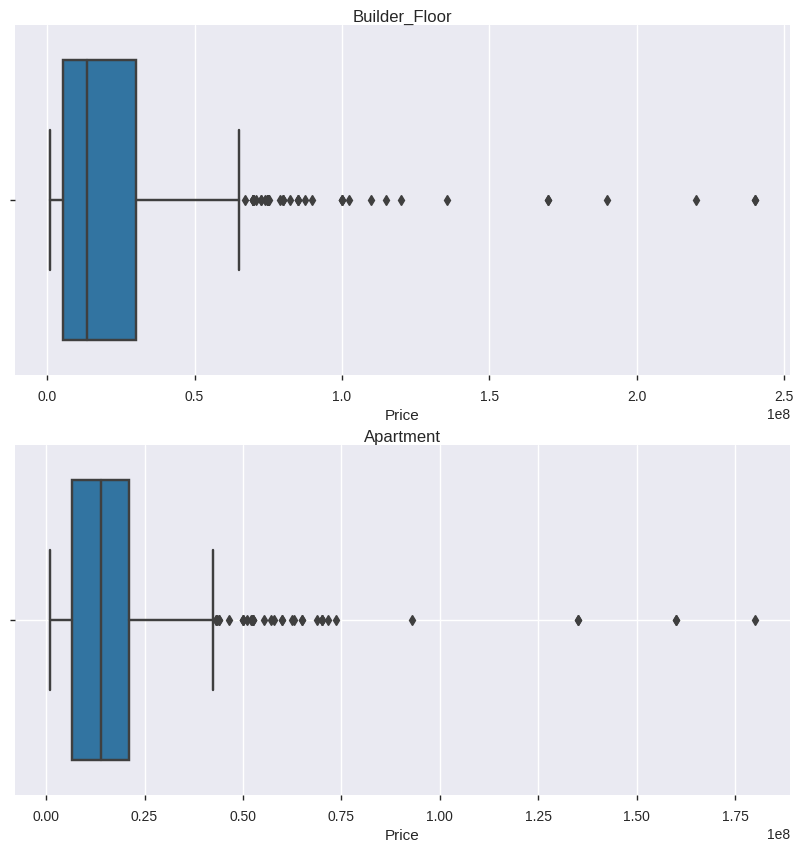

In [ ]:
grouped_box(column='Type')

**Observations**:

- Apartment listings appear to be cheaper than building floor listings.

- Most of the Apartment listings are **under र50000000/-** whereas most of the  building_floor listings are above **र50000000/-**

#### **Question**: What is the price distribution with respect to Status of the house?

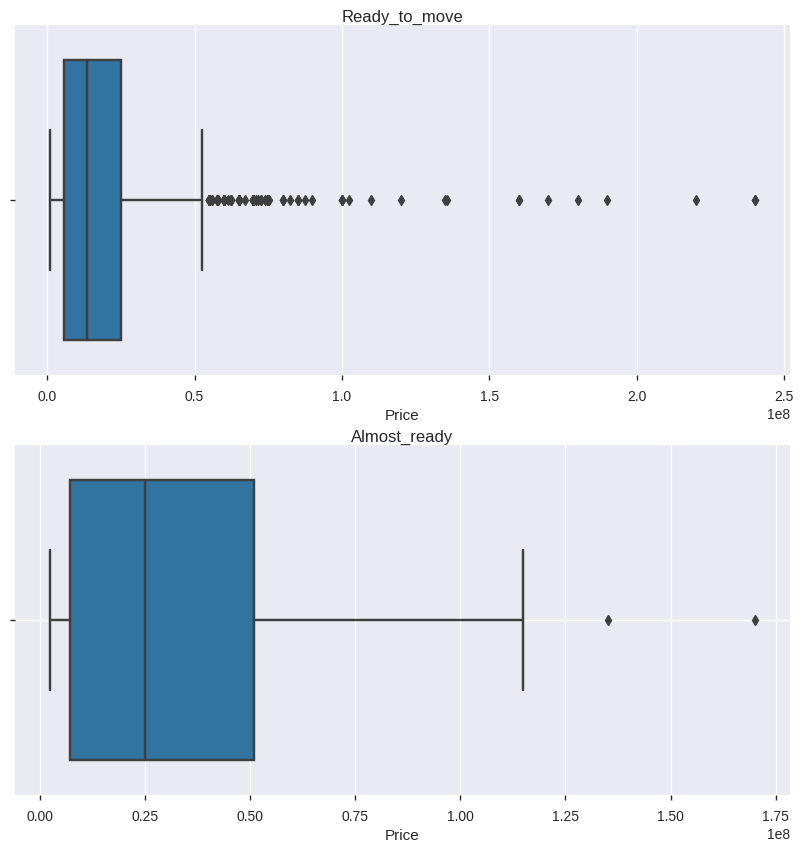

In [ ]:
grouped_box(column='Status')

**Observations**:

- House listings that are **already empty** (ready to move) are **more expensive** as compared to **Almost ready** homes.

#### **Question**: What is the price distribution with respect to type of Furnishing?

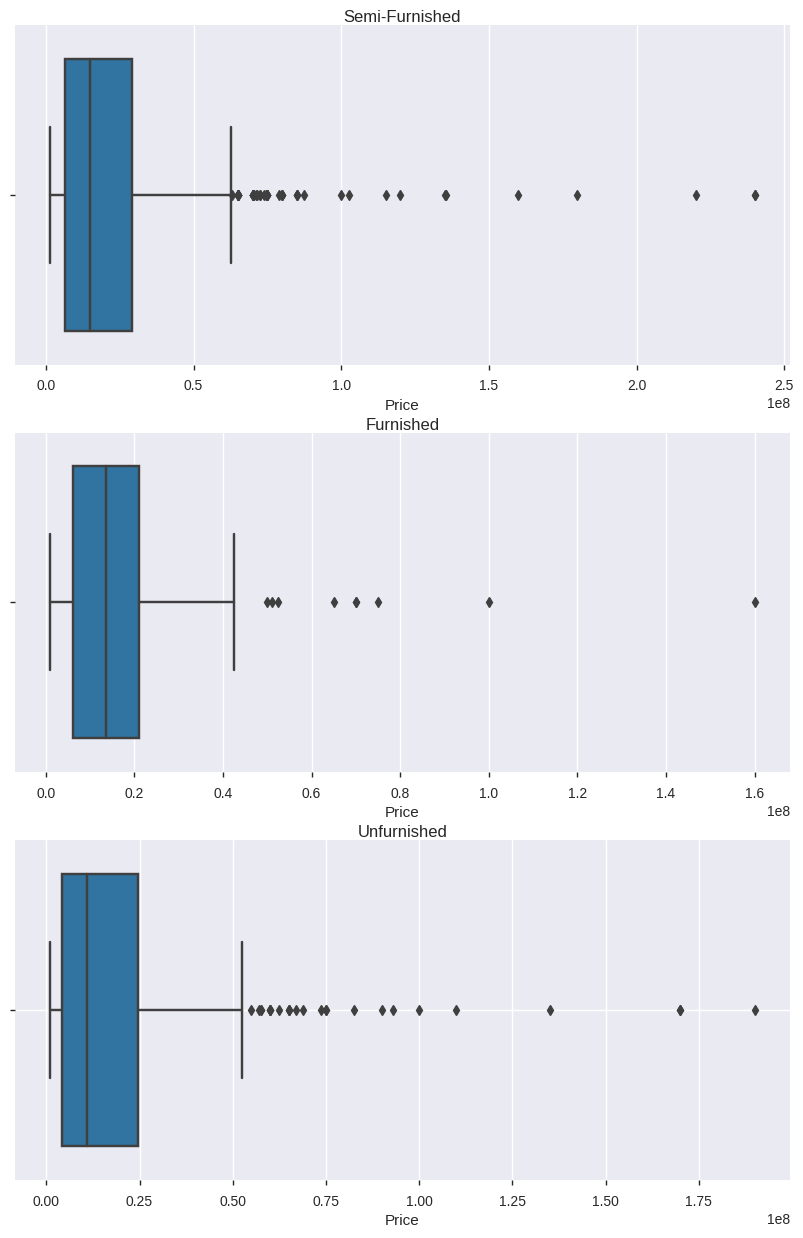

In [ ]:
grouped_box(column='Furnishing')

**Observations**:

- Availability of **semi-furnished homes** raises the **prices up significantly** as compared to furnished and unfurnished options.

- **Already furnished options** cause the price to go **cheaper** than **unfurnished homes**.

#### **Question**: What is the price distribution with respect to house's transaction type?

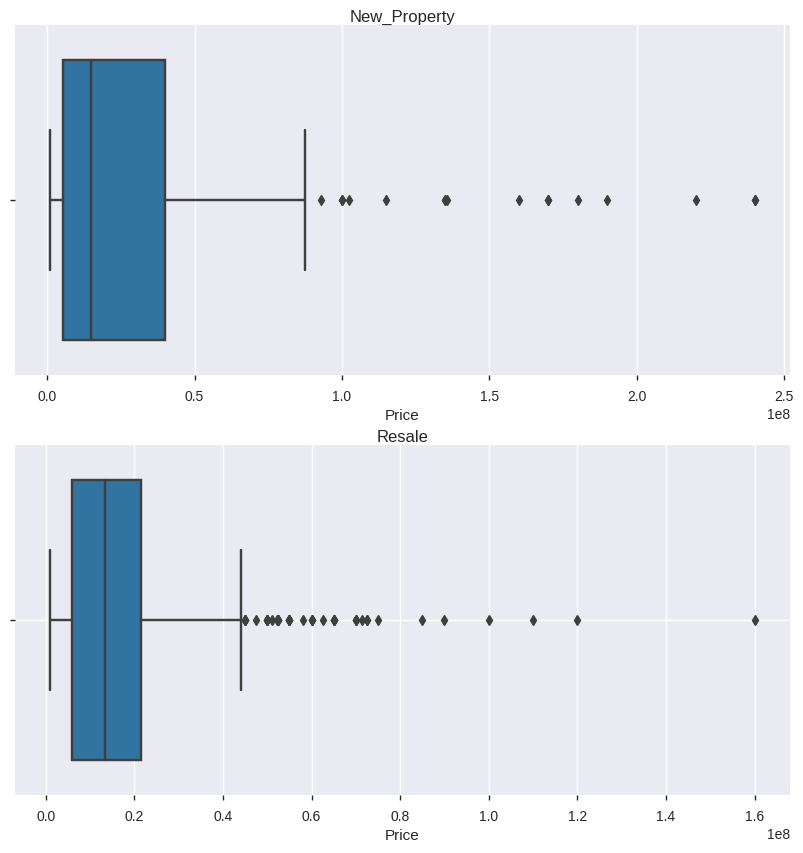

In [ ]:
grouped_box(column='Transaction')

**Observations**:

- New properties are priced higher than the Resale ones, most of the resale prices being less than **र60000000/-**

- New listings can go as **high as र240000000 /-**

#### **Question**: What is the price distribution with respect to Type of the house and transaction type?

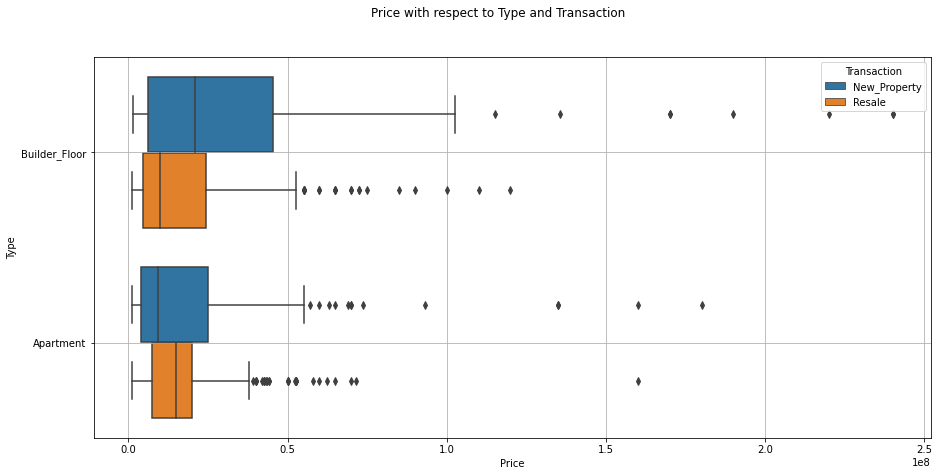

In [ ]:
fig = plt.figure(figsize=(15, 7))
sns.boxplot(x=data['Price'], y=data['Type'], hue=data['Transaction'])
plt.suptitle(t='Price with respect to Type and Transaction')
plt.grid(b=True)
plt.show()

**Observations**:

- The **most expensive** listing is a **building floor**.

- **Building floors** are quite expensive that their **resale prices rival** the prices of **new apratment** listings.

#### **Question**: What is the relation between price of the house and area of the house?

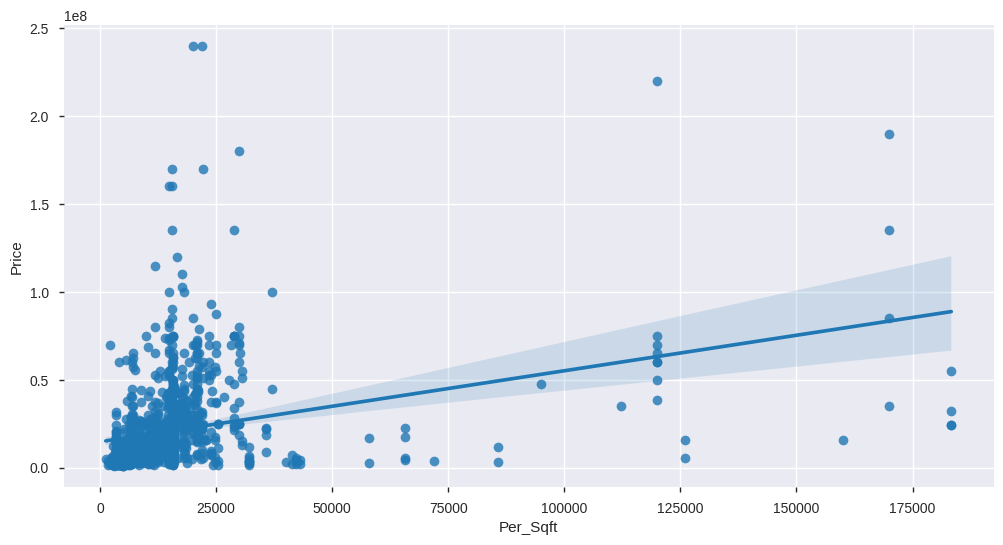

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(data['Per_Sqft'], data['Price'])
plt.grid(b=True)
plt.show()

**Observations**:

- We can observe a **slight positive relation** that whenever **Price Per_Sqft** of listed houses **increase**, the **price** of the house **increases** as well.

#### **Question**: What is the relation between price of the house and price per sq.ft. of the house?

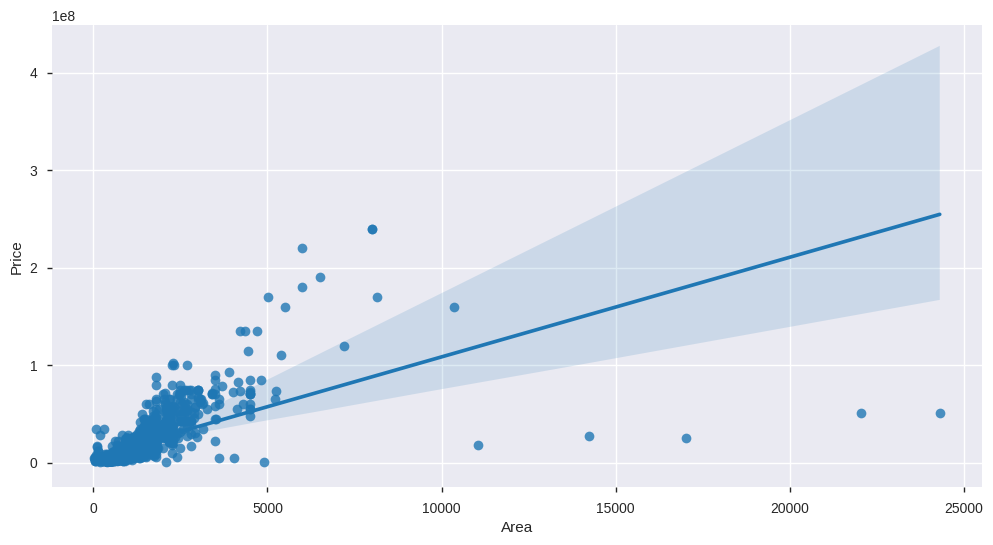

In [ ]:
  plt.figure(figsize=(12,6))
  sns.regplot(data['Area'], data['Price'])
  plt.grid(b=True)
  plt.show()

**Observations**:

- We can observe a **positive relation** that whenever **area** of listed houses **increase**, the **price** of the house **increases** as well.

- This is true till **area is 10000 sq.ft**.

- There are instances where **prices of houses are stagnant** even though the **area increases**.

#### **Question**: What is the correlation between various features of the dataset?

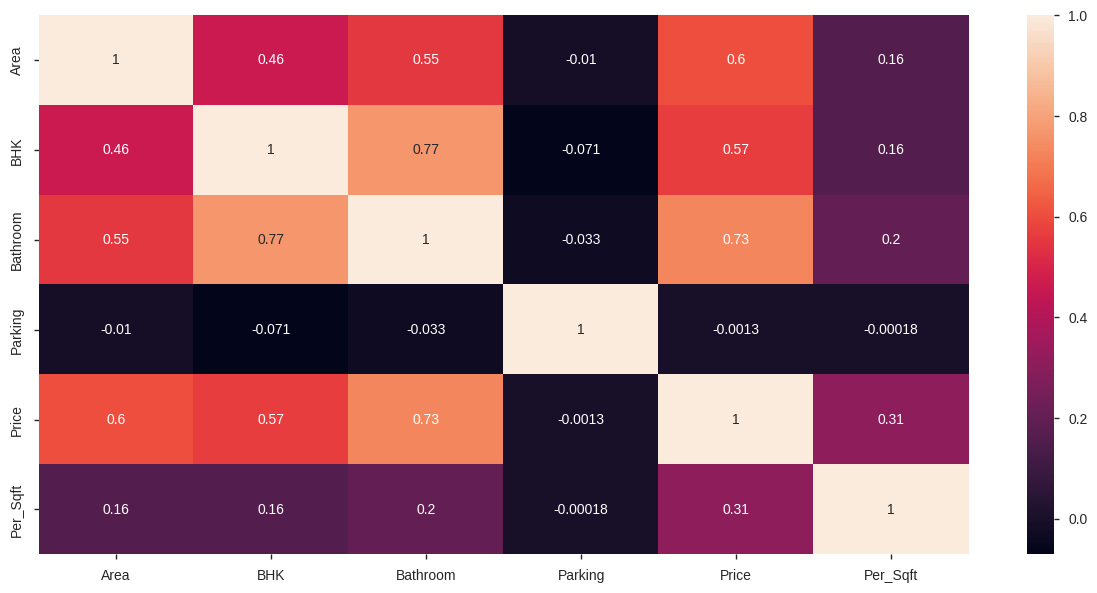

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations**:

- We can observe **high correlation** of Price with **Area, BHK, Per_Sqft**.

- **Price** has **highest positive correlation** with **Bathroom** and **least** with **Parking**.

- **Area** is **highly correlated** with all the features **except for Parking**.

- **Parking** in general, has **no correlation** with any of the features in the dataset.

<a id=section7></a>

---
# **7. Conclusion**
---

<a id=section71></a>

---
## **7.1 Summarization**
---

- **Lajpat Nagar**, **Kailash Colony**, **Shahdara**, **Garima**, **Chittaranjan Park** and **Rohini Sector** are some of the common localities listed in the dataset.

- **Semi-furnished** homes are relatively **more expensive** and **fully furnished** homes are **more cheaper**.

- **Price** is **highly related** to **Bathroom**, **Area, BHK** and, **Per_Sqft**.

- Most of the Apartment listings are **under र50000000/-** whereas most of the  building_floor listings are above **र50000000/-**

- **Building floors** are quite expensive that their **resale prices rival** the prices of **new apratment** listings.

- **Almost 50%** of the houses listed have **one parking spot**, followed by two and three.

- House listings that are **already empty** (ready to move) are **more expensive** as compared to **Almost ready** homes.

- We can observe **extreme values** of **Area** and **Price** in the dataset and sometimes **prices being stagnant** for **relatively big homes**.

<a id=section72></a>

---
## **7.2 Actionable Insights**
---

- We need a more clean dataset, specially the one which has precise and accurate information.

- We also need data from **secondary sources** that describe more about the **locality**, the **age** of house being listed, the **neighborhood area**.

- Knowing about the **type of neighborhood** like **residential** or **industrial** will also be helpful to determine if it affects the price of houses.

- **Price** is **highly related** to **Bathroom**, **Area, BHK** and, **Per_Sqft**.

- But we can also observe that **building floors** are more **expensive** than **apartments**.

- We can use this lot of information to **predict the prices of houses**, although **locality** is an **important factor** and we need more information on that.

- The company can use **this information** and **extrapolate** some of the observations throughout the country's listings.